# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** It is classification because there is a finite number of students. Regression is used for continuous or infinite sets.

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [2]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [3]:
# TODO: Calculate number of students
n_students = len(student_data) - 1 # substract first row from csv file (column labels)

# TODO: Calculate number of features
shape = student_data.shape

n_features = student_data.shape[1] - 1

# TODO: Calculate passing students
p = student_data.loc[student_data['passed']=='yes']
n_passed = len(p)

# TODO: Calculate failing students
n_failed = len(student_data.loc[student_data['passed']=='no'])

# TODO: Calculate graduation rate
grad_rate = float(n_students - n_failed)/n_students*100

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 394
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.01%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [3]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [4]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [5]:
# TODO: Import any additional functionality you may need here
from sklearn import cross_validation

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train = None
X_test = None
y_train = None
y_test = None
#X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_all, y_all, test_size = num_test, random_state = 40)

# Show the results of the split
#print "Training set has {} samples.".format(X_train.shape[0])
#print "Testing set has {} samples.".format(X_test.shape[0])
                                                        

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_all, y_all, stratify=y_all, test_size=num_test, random_state=40)
# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

print "Grad rate of train set: {:.2f}%".format(100 * (y_train == 'yes').mean())
print "Grad rate of test set: {:.2f}%".format(100 * (y_test == 'yes').mean())
                                                        

Training set has 300 samples.
Testing set has 95 samples.
Grad rate of train set: 67.00%
Grad rate of test set: 67.37%


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

**Answer: ** 

- `DECISION TREES:` 
 - Applications:
   - Classification and regression. Decision Trees has been used in a diverse number of fields which includes: Agriculture, Astronomy, Financial Analysis, Medicine, Object Recognition, Pharmacology, Remote Sensing, and Text Processing. 
  - Strenghts:
   - Fast
   - Can handle numerical and non-numerical data
   - They are easy to understand and simple to visualize
   - Low computational cost, O(log N) for the number of trained data points. 
   - Can classify more than 2 types (binary classification) of outputs
  - Weaknesses:
   - Don't generalize the data (overfit). 
   - Unstable
   - Data not balanced could be proned to generate biased trees
 - Reasons for choosing: Easy to interpret, fast computation, doesn not require large sets of training data


(www.cbcb.umd.edu/~salzberg/docs/murthy_thesis/survey/node32.html)


- `NAIVE BAYES:` 
 - Applications:
   - The have performed very well in many real-world  classification problems, such as spam detection, document   classification. 
   - Assumes each distribution can be independently estimated, thus Naive. 
   - Its independency assumption alliviates the problem of course of dimensionality, it usually requires a smaller sets of data for training. 
 - Strenghts: 
   - Classification, seems to perform well for binary classification problems
 - Weaknesses: 
   - Performance might not be as good as SVM, it doens't model the interrelation between attributes
   - Bad estimators
 - Reasons for choosing: Performs well for categorical data, our data contains some numberical values and many categorical ones. It's fast, doesn't require much training data. Since it assumes independency among features, we have 30 features in our data set, computation is fast. 
 
 
- `SUPPORT VECTOR MACHINE:`
 - Applications: 
   - Classification (SVC) and regression (SVR)
   - SVM has been used for Financial Applications (www.svms.org/finance)
   - It has also been applied to image classification with better performance than traditional query refinement methods (www.wikipedia.org)
 - Strenghts: 
   - Performs well in higher dimensions even with small training sets
   - Memory efficient, uses support vectors in the decision function
   - Flexible, kernel functions can be implemented for the decision function
 - Weaknesses:
   - Preforms poorly for cases when number of features is much greated than the training set
 - Reasons for choosing:  
   - Outperforms Decision Trees in a variety of applications
   - Performs well with high input dimension space (number of features). 
   - Requires more computation than Decision Trees and Naive Bayes, but its performance might make it a worth it.




### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [6]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [16]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# TODO: Initialize the three models
clf_A = SVC(random_state = 0)
clf_B = DecisionTreeClassifier(random_state = 0)
clf_C = GaussianNB()

# TODO: Set up the training set sizes
#X_train_100 = X_train[0:100]
#y_train_100 = y_train[0:100]

#X_train_200 = X_train[0:200]
#y_train_200 = y_train[0:200]

#X_train_300 = X_train[0:300]
#y_train_300 = y_train[0:300]

# TODO: Execute the 'train_predict' function for each classifier and each training set size
# loop thru models, then thru train sizes
for clf in [clf_A, clf_B, clf_C]:
    print "\n{}: \n".format(clf.__class__.__name__)
    for n in [100, 200, 300]:
        train_predict(clf, X_train[:n], y_train[:n], X_test, y_test)


#compare the results of the models with a benchmark of predicting all "yes" values on the test set
from sklearn.metrics import f1_score
print "\n\nF1 score for predicting all \"yes\" on test set: {:.4f}".format(
    f1_score(y_test, ['yes']*len(y_test), pos_label='yes', average='binary'))

#print y_test



SVC: 

Training a SVC using a training set size of 100. . .
Trained model in 0.0016 seconds
Made predictions in 0.0009 seconds.
F1 score for training set: 0.8630.
Made predictions in 0.0008 seconds.
F1 score for test set: 0.8027.
Training a SVC using a training set size of 200. . .
Trained model in 0.0036 seconds
Made predictions in 0.0026 seconds.
F1 score for training set: 0.8852.
Made predictions in 0.0013 seconds.
F1 score for test set: 0.8219.
Training a SVC using a training set size of 300. . .
Trained model in 0.0072 seconds
Made predictions in 0.0052 seconds.
F1 score for training set: 0.8701.
Made predictions in 0.0018 seconds.
F1 score for test set: 0.8108.

DecisionTreeClassifier: 

Training a DecisionTreeClassifier using a training set size of 100. . .
Trained model in 0.0007 seconds
Made predictions in 0.0002 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.6610.
Training a DecisionTreeClassifier using a training set

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - SVC**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |               0.0016          |     0.0008                   |       0.8630           |        0.8027         |
| 200               |        0.0036          |            0.0013            |        0.8852          |        0.8219         |
| 300               |      0.0072                   |       0.0018                 |       0.8701           |    0.8108      |

** Classifer 2 - DecisionTreeClassifier**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |         0.0007                |           0.0002             |      1.0            |      0.66           |
| 200               |      0.0013            |   0.0002                     |      1.0            |   0.7328              |
| 300               |                 0.0018        |            0.0002            |          1.0        |     0.7154     |

** Classifer 3 - GaussianNB**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |             0.0007            |  0.0003                      |          0.7907        |     0.7742            |
| 200               |          0.0008               |   0.0003                     |      0.7839            |    0.7360             |
| 300               |         0.0011                |              0.0003          |     0.7933             |       0.7538          |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Chosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: **
The two best models are SVC and GaussianNB, based on F1 score test, both outperform DecisionTreeClassifier. When comparing SVC against GaussianNB, SVC does a better job modeling the data by almost 6% improvement over GaussianNB. If there is a case where Prediction time is a factor, I would be inclined to use GaussianNB over SVC since SVC takes 6.0 longer (0.0018/0.0003), but considering that even the prediction time for SVC is in the order of milliseconds, SVC seems the better choice. Given that training is done only once, the training time factor would not be takes as a factor.  

If we consider the training sizes 100,200, and 300, SVC performs better than GaussianNB by roughly 3%, 9% and 6% respectively (based F1 score test). In general, SVC would be able to model better than GaussianNB because the GaussianNB pays costly the assumption that the attributes are independent from one another. For instance, freetime and studytime could be correlated but GaussianNB assumes they are independent.

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. For example if you've chosen to use a decision tree or a support vector machine, how does the model go about making a prediction?*

**Answer: **
- The model works by finding the boundary that separates the students who "passed" and who did "not passed". The boundary should be drawn so as to maximize the distance between the two classes. The distance is measured from the points that are closest to the boundary, these are called the supporting vectors. 
![SVM](https://udacity-github-sync-content.s3.amazonaws.com/_imgs/19273/1468014011/optimal-hyperplane.png)

- For the case when a linear boundary is not possible, a transformed version of the input space -the feature space- is first constructed, the feature space should be constructed so as to make possible to drawn a hyperplane that divides the two classes. The algorithm selects the boundary with the largest gaps between the classes. 
![SVM](https://udacity-github-sync-content.s3.amazonaws.com/_imgs/19273/1464624531/1gvce.png)
- With the model generated from training data (students who 'passed' and did 'not passed'), we can predict new students by feeding those points into the model, the model transforms the new input data point into the feature space and predicts whether the student passes or fails. 

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

Made predictions in 0.0049 seconds.
Tuned model has a training F1 score of 0.8301.
Made predictions in 0.0016 seconds.
Tuned model has a testing F1 score of 0.8194.
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
[mean: 0.80240, std: 0.00000, params: {'C': 10, 'gamma': 0.0001}, mean: 0.80240, std: 0.00000, params: {'C': 10, 'gamma': 0.001}, mean: 0.80240, std: 0.00000, params: {'C': 10, 'gamma': 0.01}, mean: 0.80240, std: 0.00000, params: {'C': 10, 'gamma': 0.1}, mean: 0.80240, std: 0.00000, params: {'C': 3, 'gamma': 0.0001}, mean: 0.80240, std: 0.00000, params: {'C': 3, 'gamma': 0.001}, mean: 0.80240, std: 0.00000, params: {'C': 3, 'gamma': 0.01}, mean: 0.80240, std: 0.00000, params: {'C': 3, 'gamma': 0.1}, mean: 0.80240, std: 0.00000, params: {'C': 0.01, 'gamma': 0.0001}, mean: 0.80240, std: 0.00000, params: {'C':

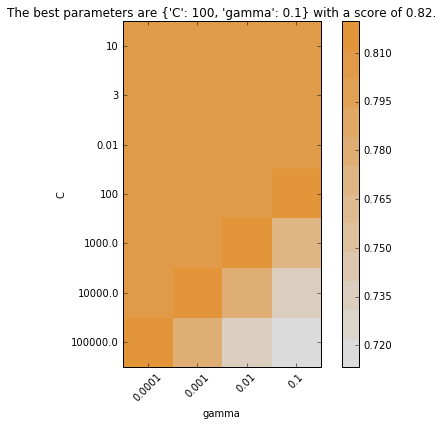

In [36]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

# TODO: Create the parameters list you wish to tune
parameters = { 'C':[ 10, 3, 0.01, 100, 1e3, 1e4, 1e5],            
               'gamma': [0.0001, 0.001, 0.01, 0.1]}
              

# TODO: Initialize the classifier
clf = SVC()

# TODO: Make an f1 scoring function using 'make_scorer' 
def f1_scoring_fnc(y_true, y_predict):
    """ Calculates and return the perfomance between true and predicted
    values based on the f1_score"""
    score = f1_score(y_true, y_predict, pos_label='yes')
    return score
    
f1_scorer = make_scorer(f1_scoring_fnc)
# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, f1_scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters

#applying normalization to features
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))
print clf
print grid_obj.grid_scores_

scores = [x[1] for x in grid_obj.grid_scores_]
print len(scores)


lenC = len(parameters.get('C'))
lenGamma = len(parameters.get('gamma'))
scores = np.array(scores).reshape(lenC, lenGamma)


########################### HeatMap visualization of GridSearch#######################
from matplotlib import colors
import matplotlib.pyplot as plt
%matplotlib inline
ddl_heat = ['#DBDBDB','#DCD5CC','#DCCEBE','#DDC8AF','#DEC2A0','#DEBB91',\
            '#DFB583','#DFAE74','#E0A865','#E1A256','#E19B48','#E29539']
ddlheatmap = colors.ListedColormap(ddl_heat)

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=ddlheatmap)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(lenGamma), parameters.get('gamma'), rotation=45)
plt.yticks(np.arange(lenC), parameters.get('C'))
plt.title("The best parameters are {} with a score of {:0.2f}.".format(grid_obj.best_params_, grid_obj.best_score_))
plt.show()

### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **
- The final model's F1 score (after normalization) for the training is 0.8301, lower than the untuned model's F1 score 0.8701. The final model's F1 score for the test is 0.8194, slighly better than the untuned model's F1 score 0.8108.The slight improvement on the F1 score for the test data isn't significant, this indicates that the default parameters produce a performance almost as good as our gridsearch approach indicating that for this specific data, using default paramenters are close to 'optimal'. Note: I also used larger arrays of parameters in 'parameters' and also added different Kernels, the improvement wasn't noticeable and they were removed from the final version because of running time. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.